In [1]:
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


# Task 1. Prior predictive checks

In [4]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
df = sim.draws_pd()
df.head()

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,232.163,8.12614,217.968
1,0.0,0.0,188.640,70.33170,297.765
2,0.0,0.0,170.755,11.77890,178.482
3,0.0,0.0,182.602,19.51800,217.971
4,0.0,0.0,152.394,4.67849,159.762


### Plot histograms of mu, sigma and simulated height.

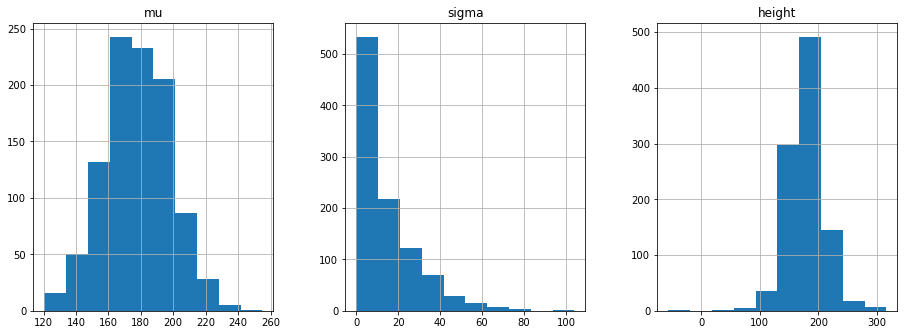

In [6]:
mu = sim.stan_variable('mu')
sigma = sim.stan_variable('sigma')
SH = sim.stan_variable('height')

f, ax = plt.subplots(1,3, figsize=(15,5))
df.hist('mu',    bins = 10, ax=ax[0])
df.hist('sigma', bins = 10, ax=ax[1])
df.hist('height',bins = 10, ax=ax[2])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.1)

### Plot a joint distribution of mu.

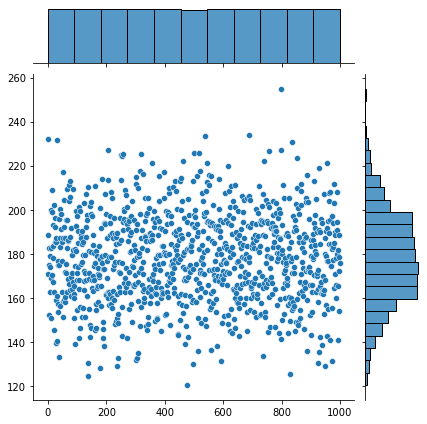

In [7]:
sns.jointplot(data = mu)

### Plot a joint distribution of sigma.

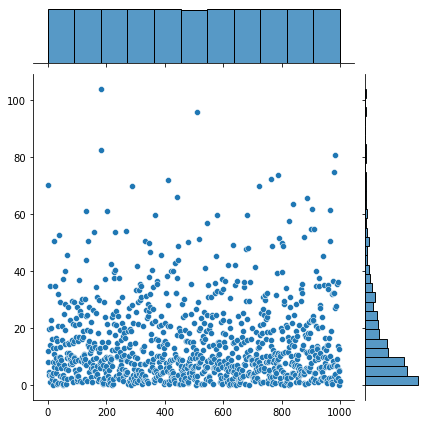

In [8]:
sns.jointplot(data = sigma)